## Load Data

In [85]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False) 

In [86]:
df = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/pengamatan.csv")
columns = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/columns.csv")
legends = pd.read_csv("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/legends.csv")

## Preview Data

### Sample Data

In [87]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
3,2025-08-08,A,4,9.6,10.0,10.2,10.6
56,2025-08-09,D,4,24.6,25.5,25.9,28.5
11,2025-08-08,C,2,7.5,8.6,9.2,8.3
25,2025-08-08,F,1,7.7,8.6,8.2,9.0
12,2025-08-08,C,3,10.0,9.5,10.5,11.2


### Columns Description

In [88]:
columns

,nama_kolom,keterangan
0,tanggal,Tanggal pengamatan
1,p,Perlakuan
2,u,Ulangan
3,diameter_1,Diameter isolat (mm) yang diukur lurus vertikal dengan arah huruf pada label
4,diameter_2,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_1
5,diameter_3,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_2
6,diameter_4,Diameter isolat (mm) yang diukur 45 derajat ke kanan dari diameter_3


### Legends

In [89]:
legends

,perlakuan,keterangan
0,A,Kontrol negatif (tanpa perlakuan)
1,B,Larutan ekstrak kulit nanas 50mg/mL
2,C,Larutan ekstrak kulit nanas 100mg/mL
3,D,Larutan ekstrak kulit nanas 200mg/mL
4,E,Larutan ekstrak kulit nanas 400mg/mL
5,F,Kontrol positif (fungisida kimia)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tanggal     60 non-null     object 
 1   p           60 non-null     object 
 2   u           60 non-null     int64  
 3   diameter_1  60 non-null     float64
 4   diameter_2  60 non-null     float64
 5   diameter_3  60 non-null     float64
 6   diameter_4  60 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ KB


## Cleaning Data

In [91]:
df_clean = df
df_clean["diameter_mm"] = df_clean[["diameter_1", "diameter_2", "diameter_3", "diameter_4",]].mean(axis=1)
df_clean["tanggal"] = pd.to_datetime(df_clean["tanggal"])
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter_mm
57,2025-08-09,C,2,21.0,23.0,22.3,19.1,21.350
52,2025-08-09,B,3,19.1,19.7,18.6,18.7,19.025
28,2025-08-08,F,4,8.4,9.1,9.1,8.1,8.675
12,2025-08-08,C,3,10.0,9.5,10.5,11.2,10.300
26,2025-08-08,F,2,7.0,7.6,9.4,9.1,8.275


In [92]:
drop_cols = ["diameter_1", "diameter_2", "diameter_3", "diameter_4"]
df_clean = df_clean.drop(columns=drop_cols)
df_clean.sample(5)

,tanggal,p,u,diameter_mm
15,2025-08-08,D,1,11.125
2,2025-08-08,A,3,10.275
58,2025-08-09,C,3,24.550
8,2025-08-08,B,4,10.450
57,2025-08-09,C,2,21.350


## Ringkasan Statistik

In [93]:
from IPython.display import display, HTML
display(HTML(df_clean.drop(columns=["u"]).groupby(["tanggal", "p"]).describe().to_html()))

## Visualisasi

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Theme bersih dan profesional
sns.set_theme(
    style="whitegrid",           # latar putih + grid tipis
    context="talk",              # font sedikit besar, cocok untuk presentasi/skripsi
    palette="colorblind"         # aman untuk pembaca dengan buta warna
)

# Modifikasi detail font & grid
plt.rcParams.update({
    "axes.titlesize": 16,        # ukuran judul
    "axes.labelsize": 14,        # ukuran label sumbu
    "xtick.labelsize": 12,       # ukuran label x
    "ytick.labelsize": 12,       # ukuran label y
    "axes.edgecolor": "black",   # garis sumbu hitam
    "axes.linewidth": 1.0,       # ketebalan garis sumbu
    "grid.color": "gray",        # warna grid
    "grid.linestyle": "--",      # grid putus-putus
    "grid.linewidth": 0.5,       # ketebalan grid tipis
    "legend.fontsize": 12,       # ukuran font legenda
    "legend.frameon": True,      # kotak legenda
    "legend.framealpha": 0.9,    # transparansi legenda
    "figure.dpi": 300            # kualitas tinggi untuk cetak
})

### Grafik Pertumbuhan

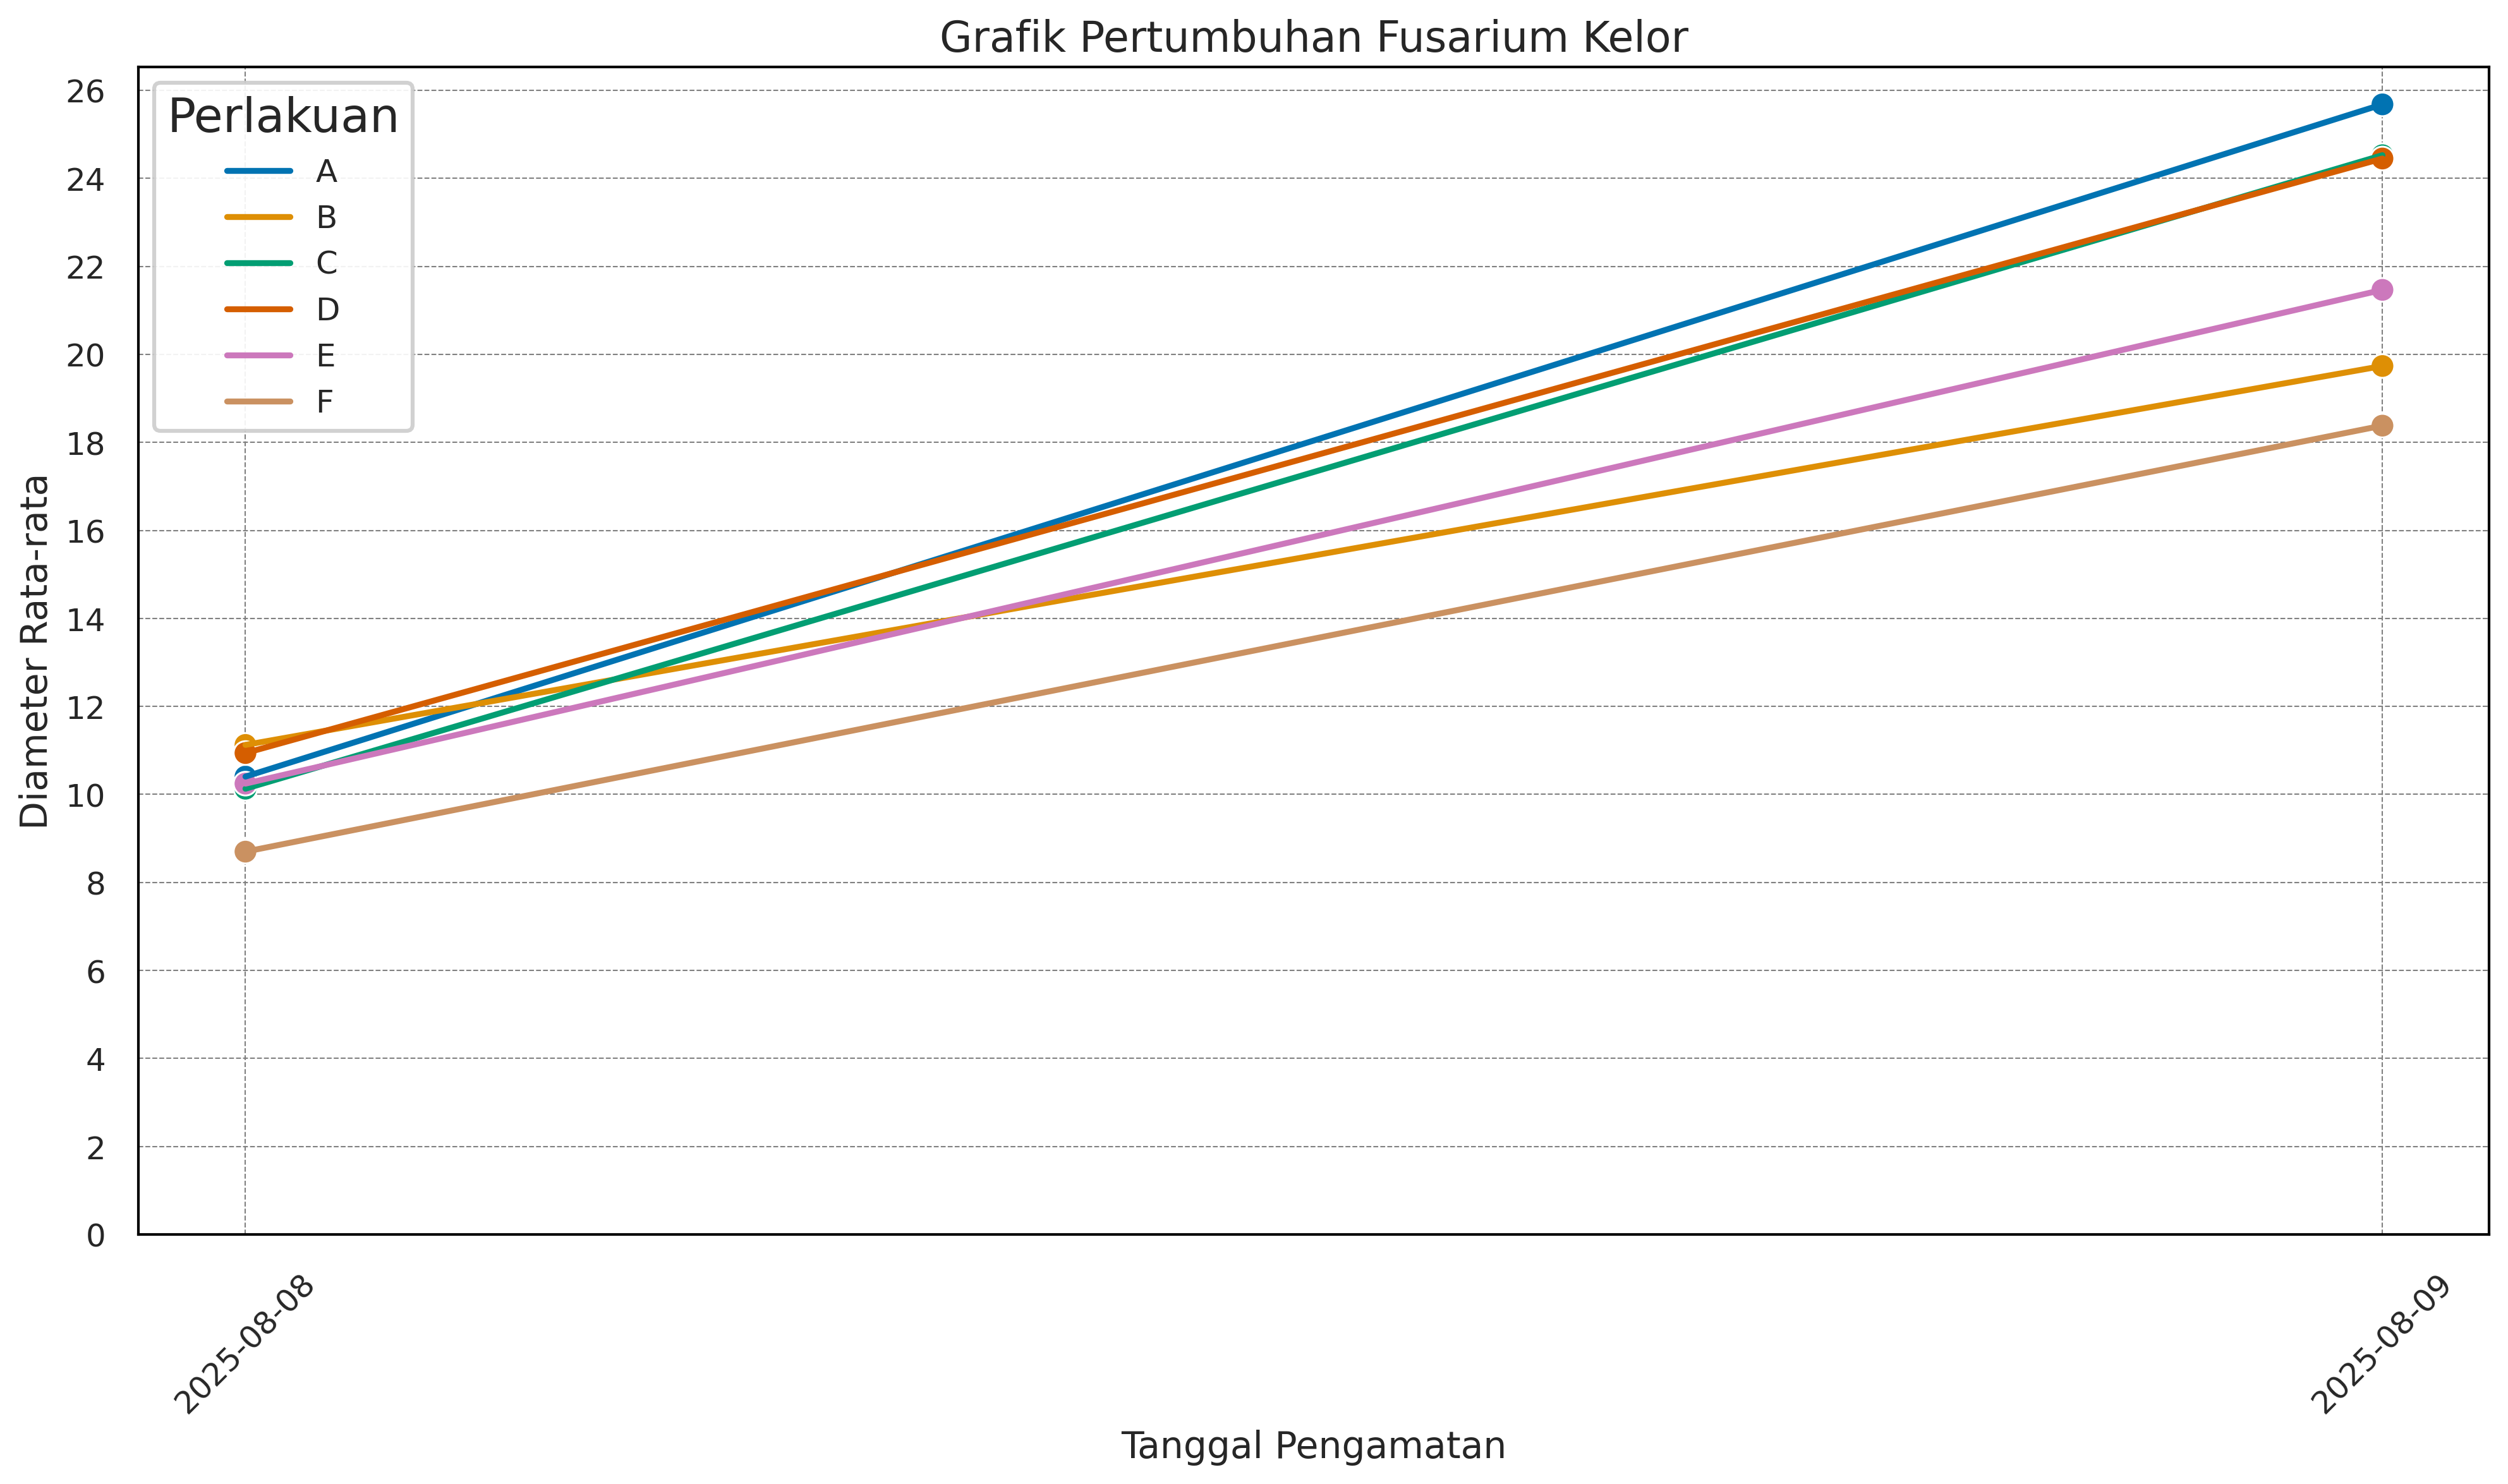

In [112]:
plt.figure(figsize=(16, 8,))

df_grouped = df_clean.groupby(by=["tanggal","p"]).agg({"diameter_mm": "mean"}).reset_index()

sns.lineplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             errorbar=None)

sns.scatterplot(data=df_grouped,
             x="tanggal",
             y="diameter_mm",
             hue="p",
             legend=None)

plt.title("Grafik Pertumbuhan Fusarium Kelor")
plt.xlabel("Tanggal Pengamatan")
plt.ylabel("Diameter Rata-rata")
plt.legend(title="Perlakuan")

plt.yticks(np.arange(0, df_clean.diameter_mm.max(axis=0), 2))
plt.xticks(df_clean.tanggal.unique(),rotation=45)
plt.show()